In [159]:
library(tidyverse)


In [160]:
# read_syntenic_block_file <- read_delim("/home/jpm73279/genome_downloads/C4_markers/C4-genes.syntenic.blocks.tsv")

In [161]:
marker_file_paths <- c("/home/jpm73279/genome_downloads/C4_markers/Os.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Pm.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Sb.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Uf.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Zm.c4_markers.bed")

# Function to read and process the file
process_file <- function(file_path) {
  species <- substr(basename(file_path), 1, 2)
  read_delim(file_path, delim = "\t", col_names = c("chrom", "start", "end", "geneID", "name", "type")) %>% 
    dplyr::select("chrom","start","end","geneID","name","type") %>%
    dplyr::mutate(species = (species))
}

# Apply the function to each file and store results in a list
list_of_dataframes <- lapply(marker_file_paths, process_file)

# Optionally combine all dataframes into one if needed
markers <- bind_rows(list_of_dataframes) %>% 
    dplyr::select(geneID,name,type,species)

Rows: 30 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, geneID, name, type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 52 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, geneID, name, type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 33 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, geneID, name, type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 31 Columns: 6

In [162]:
# reference_regions <- read_syntenic_block_file %>% 
#     dplyr::select(-list_name) %>% 
#     dplyr::select(chr1:id1,region_name) %>% 
#     dplyr::mutate(species = "Zm")%>% 
#     dplyr::rename(chr = chr1, 
#                  start = start1,
#                  end = end1,
#                  geneID = id1)

# other_regions <- read_syntenic_block_file %>% 
#     dplyr::select(-list_name) %>% 
#     dplyr::select(chr2:id2,region_name, genome2) %>% 
#     dplyr::rename(chr = chr2, 
#                  start = start2,
#                  end = end2,
#                  geneID = id2,
#                  species = genome2)

# combined_syntenic_regions <- bind_rows(reference_regions, other_regions)

In [163]:
# markers_combined_syntenic_regions <- left_join(markers, combined_syntenic_regions, by = c("geneID", "species"))

In [ ]:
###### Define a function to read the data and add columns
read_and_annotate_intersect <- function(file_path, cell_type, species_abbr) {
  read_delim(file_path, delim = "\t", col_names = FALSE, col_types = "cccccccccc") %>%
    dplyr::mutate(
      cts_acts = cell_type,
      species = species_abbr
    )
}

files_conditions <- list(
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/os.extended_c4_genes.bundle_sheath.intersection.bed", cell_type = "bundle_sheath", species = "Os"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/os.extended_c4_genes.mesophyll.intersection.bed", cell_type = "mesophyll", species = "Os"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/pm.extended_c4_genes.bundle_sheath.intersection.bed", cell_type = "bundle_sheath", species = "Pm"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/pm.extended_c4_genes.mesophyll.intersection.bed", cell_type = "mesophyll", species = "Pm"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/sb.extended_c4_genes.bundle_sheath.intersection.bed", cell_type = "bundle_sheath", species = "Sb"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/sb.extended_c4_genes.mesophyll.intersection.bed", cell_type = "mesophyll", species = "Sb"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/uf.extended_c4_genes.bundle_sheath.intersection.bed", cell_type = "bundle_sheath", species = "Uf"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/uf.extended_c4_genes.mesophyll.intersection.bed", cell_type = "mesophyll", species = "Uf"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/zm.extended_c4_genes.bundle_sheath.intersection.bed", cell_type = "bundle_sheath", species = "Zm"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/zm.extended_c4_genes.mesophyll.intersection.bed", cell_type = "mesophyll", species = "Zm"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/os.extended_c4_genes.broad_intersection.bed", cell_type = "broad", species = "Os"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/pm.extended_c4_genes.broad_intersection.bed", cell_type = "broad", species = "Pm"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/sb.extended_c4_genes.broad_intersection.bed", cell_type = "broad", species = "Sb"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/uf.extended_c4_genes.broad_intersection.bed", cell_type = "broad", species = "Uf"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/10.C4_gene_relationship_only_single_gene/intersections/zm.extended_c4_genes.broad_intersection.bed", cell_type = "broad", species = "Zm")
)

# Read and annotate each file and store results in a list
annotated_data_list <- lapply(files_conditions, function(condition) {
  read_and_annotate_intersect(condition$path, condition$cell_type, condition$species)
})

# Combine results
combined_acrs_species <- bind_rows(annotated_data_list)

all_acrs_species_types <- combined_acrs_species %>% 
    ungroup() %>% 
    dplyr::left_join(., markers, by = c("species", "X5" = "name")) %>% 
    dplyr::rename(name = X5) %>% 
    rename(enzyme_location = type,
           acr_cell_type_specific_class = cts_acts,
          locus = name ) %>% 
    dplyr::mutate(acr_cell_type_specific_class = case_when(acr_cell_type_specific_class == "bundle_sheath,procambial_meristem" ~ "bundle_sheath",
                                                          acr_cell_type_specific_class == "bundle_sheath,procambium" ~ "bundle_sheath", 
                                                          TRUE ~ acr_cell_type_specific_class))


# graphing_matrix_c4_genes <- all_acrs_species_types %>% 
#     group_by(species, locus, acr_cell_type_specific_class, enzyme_location) %>% 
#     summarise(n_acrs = n())

In [190]:
all_acrs_species_types %>% 
    dplyr::filter(species == "Sb" & locus == "Sb__RCA_1")

X1,X2,X3,X4,locus,X6,X7,X8,X9,X10,acr_cell_type_specific_class,species,geneID,enzyme_location
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Chr05,76925273,76938370,Sorbiv5.1_pg32688.valid.m24.g,Sb__RCA_1,Chr05,76937715,76938216,scACR_32471;mesophyll,0,mesophyll,Sb,Sorbiv5.1_pg32688.valid.m24.g,bundle_sheath
Chr05,76925273,76938370,Sorbiv5.1_pg32688.valid.m24.g,Sb__RCA_1,Chr05,76925169,76925670,scACR_32468;broadly_accessible,NA,broad,Sb,Sorbiv5.1_pg32688.valid.m24.g,bundle_sheath
Chr05,76925273,76938370,Sorbiv5.1_pg32688.valid.m24.g,Sb__RCA_1,Chr05,76928113,76928614,scACR_32469;broadly_accessible,NA,broad,Sb,Sorbiv5.1_pg32688.valid.m24.g,bundle_sheath


In [165]:
library(tidyverse)
library(stringr)

process_file <- function(file_info) {
  file_path <- file_info$path
  cell_type <- file_info$cell_type
  species <- file_info$species

  # Read and process the file
  read_delim(file_path, 
             col_names = c("qChr", "qStart", "qEnd", "acr_name", "pval", "refFile", "rChr", "rStart", "rEnd", "rName", "rWidth", "strand"),
             col_types = "cccccccccccc") %>%
    mutate(cell_type = cell_type,
           species = species) %>%
    separate(acr_name, into = c("acr", "acr_cell_type_specific_class", "locus"), sep = ";") %>%
    mutate(
      refFile = str_replace(refFile, "\\.all_combined_regions\\.passing_regions\\.blast_passing_regions\\.intersecting_regions\\.ref\\.frac\\.bed", ""),
      refFile = str_replace(refFile, ".*\\.vs\\.", "")
    )
}

# Define file information as a list of lists
file_infos <- list(
  list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Pm.bs.ACR_conservation.intersection.bed", cell_type = "bs", species = "Pm"),
  list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Pm.ms.ACR_conservation.intersection.bed", cell_type = "ms", species = "Pm"),
  list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Sb.bs.ACR_conservation.intersection.bed", cell_type = "bs", species = "Sb"),
  list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Sb.ms.ACR_conservation.intersection.bed", cell_type = "ms", species = "Sb"),
  list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Zm.bs.ACR_conservation.intersection.bed", cell_type = "bs", species = "Zm"),
  list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Zm.ms.ACR_conservation.intersection.bed", cell_type = "ms", species = "Zm"),
  list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Uf.bs.ACR_conservation.intersection.bed", cell_type = "bs", species = "Uf"),
  list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Uf.ms.ACR_conservation.intersection.bed", cell_type = "ms", species = "Uf"),
  list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Os.bs.ACR_conservation.intersection.bed", cell_type = "bs", species = "Os"),
  list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Os.ms.ACR_conservation.intersection.bed", cell_type = "ms", species = "Os"),
  list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Os.broad.ACR_conservation.intersection.bed", cell_type = "broad", species = "Os"),
  list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Pm.broad.ACR_conservation.intersection.bed", cell_type = "broad", species = "Pm"),
  list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Sb.broad.ACR_conservation.intersection.bed", cell_type = "broad", species = "Sb"),
  list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Uf.broad.ACR_conservation.intersection.bed", cell_type = "broad", species = "Uf"),
  list(path = "/home/jpm73279/genome_downloads/C4_markers/conservation/Zm.broad.ACR_conservation.intersection.bed", cell_type = "broad", species = "Zm")
)

# Process each file
acr_scored_conservation <- bind_rows(lapply(file_infos, process_file)) %>% 
  dplyr::filter(rName != ".") %>% 
  tidyr::separate(rName, into = c("RefFrom", "racr_name", "rcell_type", "gene_family", "gene_family2"), sep = ";") %>% 
    dplyr::select(acr, acr_cell_type_specific_class, locus, racr_name, rcell_type , gene_family, rWidth, species) %>% 
    dplyr::mutate(acr_cell_type_specific_class = case_when(acr_cell_type_specific_class == "bundle_sheath,procambial_meristem" ~ "bundle_sheath",
                                                          acr_cell_type_specific_class == "bundle_sheath,procambium" ~ "bundle_sheath", 
                                                          TRUE ~ acr_cell_type_specific_class))





In [167]:
all_acrs_species_types_split_acrs <- all_acrs_species_types %>% 
    dplyr::select(locus, X9, acr_cell_type_specific_class, species, enzyme_location) %>% 
    rename(reference_acr = X9) %>% 
    separate(reference_acr, into = c("acr", "acr_cell_type_specific_class"), sep = ";") %>% 
    dplyr::mutate(acr_cell_type_specific_class = case_when(acr_cell_type_specific_class == "bundle_sheath,procambial_meristem" ~ "bundle_sheath",
                                                          acr_cell_type_specific_class == "bundle_sheath,procambium" ~ "bundle_sheath", 
                                                          TRUE ~ acr_cell_type_specific_class))



In [168]:
counting_acr_number_type <- all_acrs_species_types_split_acrs %>% 
    dplyr::ungroup() %>% 
    dplyr::group_by(locus, acr_cell_type_specific_class, species, enzyme_location) %>% 
    summarise(counts = n()) %>% 
    dplyr::ungroup()


`summarise()` has grouped output by 'locus', 'acr_cell_type_specific_class',
'species'. You can override using the `.groups` argument.


In [169]:
acrs_combined_conservation <- left_join(all_acrs_species_types_split_acrs,
          acr_scored_conservation,
          by = c("acr", "locus","acr_cell_type_specific_class", "species"))

acrs_combined_conservation_filtered <- acrs_combined_conservation %>% 
    dplyr::filter(is.na(racr_name) != TRUE)

In [170]:
counts_of_conserved_acr_by_class <- acrs_combined_conservation_filtered %>% 
    select(acr, locus, acr_cell_type_specific_class, species, 
                    enzyme_location, gene_family) %>% 
    dplyr::distinct() %>% 
    dplyr::group_by(locus, acr_cell_type_specific_class, species) %>% 
       summarise(conserved_acr_count = n()) %>% 
    dplyr::ungroup()

`summarise()` has grouped output by 'locus', 'acr_cell_type_specific_class'.
You can override using the `.groups` argument.


In [171]:
counts_of_conserved_acr_merged_acr_class <- counts_of_conserved_acr_by_class 

In [173]:
combined_acr_number_conservation_count <- full_join(counting_acr_number_type, counts_of_conserved_acr_by_class,
         by = join_by(locus, acr_cell_type_specific_class, species)) %>% 
    dplyr::mutate(conserved_acr_count = case_when(is.na(conserved_acr_count) == TRUE ~ 0,
                                                 TRUE ~ conserved_acr_count )) %>%
    dplyr::rename(total_acrs = counts) %>% 
    
    mutate(non_conserved_acrs = total_acrs - conserved_acr_count) 

### Generation of Figures Looking at the Conservation of ALL regulatory Regions

In [174]:
counts_of_conserved_acr_by_class <- combined_acr_number_conservation_count%>% 
    group_by(locus, species, enzyme_location) %>% 
    summarise(total_acrs_all = sum(total_acrs), 
             conserved_acrs_all = sum(conserved_acr_count),
             non_conserved_acrs_all = sum(non_conserved_acrs))  %>% 
    pivot_longer(cols = c(conserved_acrs_all, non_conserved_acrs_all),
        names_to = "acr_type_cons_noncons",
        values_to = "acr_counts") %>% 
    dplyr::mutate(proportion = acr_counts / total_acrs_all)
head(counts_of_conserved_acr_by_class)

`summarise()` has grouped output by 'locus', 'species'. You can override using
the `.groups` argument.


locus,species,enzyme_location,total_acrs_all,acr_type_cons_noncons,acr_counts,proportion
<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>
Os__AlaAT_1,Os,mesophyll,1,conserved_acrs_all,0,0.0000000
Os__AlaAT_1,Os,mesophyll,1,non_conserved_acrs_all,1,1.0000000
Os__AlaAT_2,Os,mesophyll,6,conserved_acrs_all,2,0.3333333
Os__AlaAT_2,Os,mesophyll,6,non_conserved_acrs_all,4,0.6666667
Os__AlaAT_3,Os,mesophyll,4,conserved_acrs_all,2,0.5000000
Os__AlaAT_3,Os,mesophyll,4,non_conserved_acrs_all,2,0.5000000


In [175]:
combined_gene_family_merged_cell_types <- counts_of_conserved_acr_by_class %>% 
    #dplyr::filter(is.na(number_passing_loci) != TRUE) %>% 
    tidyr::separate(locus, into = c("species_other", "loci"), sep = "__",remove = FALSE) %>%
    tidyr::separate(loci, into = c("gene_family", "number"), sep = "_", remove = FALSE)

head(combined_gene_family_merged_cell_types)

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 2 rows [203, 204].”


locus,species_other,loci,gene_family,number,species,enzyme_location,total_acrs_all,acr_type_cons_noncons,acr_counts,proportion
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>
Os__AlaAT_1,Os,AlaAT_1,AlaAT,1,Os,mesophyll,1,conserved_acrs_all,0,0.0000000
Os__AlaAT_1,Os,AlaAT_1,AlaAT,1,Os,mesophyll,1,non_conserved_acrs_all,1,1.0000000
Os__AlaAT_2,Os,AlaAT_2,AlaAT,2,Os,mesophyll,6,conserved_acrs_all,2,0.3333333
Os__AlaAT_2,Os,AlaAT_2,AlaAT,2,Os,mesophyll,6,non_conserved_acrs_all,4,0.6666667
Os__AlaAT_3,Os,AlaAT_3,AlaAT,3,Os,mesophyll,4,conserved_acrs_all,2,0.5000000
Os__AlaAT_3,Os,AlaAT_3,AlaAT,3,Os,mesophyll,4,non_conserved_acrs_all,2,0.5000000


In [178]:
combined_gene_family_merged_cell_types %>% 
    dplyr::filter(species == "Sb" & gene_family == "RCA")

locus,species_other,loci,gene_family,number,species,enzyme_location,total_acrs_all,acr_type_cons_noncons,acr_counts,proportion
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>
Sb__RCA_1,Sb,RCA_1,RCA,1,Sb,bundle_sheath,3,conserved_acrs_all,0,0
Sb__RCA_1,Sb,RCA_1,RCA,1,Sb,bundle_sheath,3,non_conserved_acrs_all,3,1


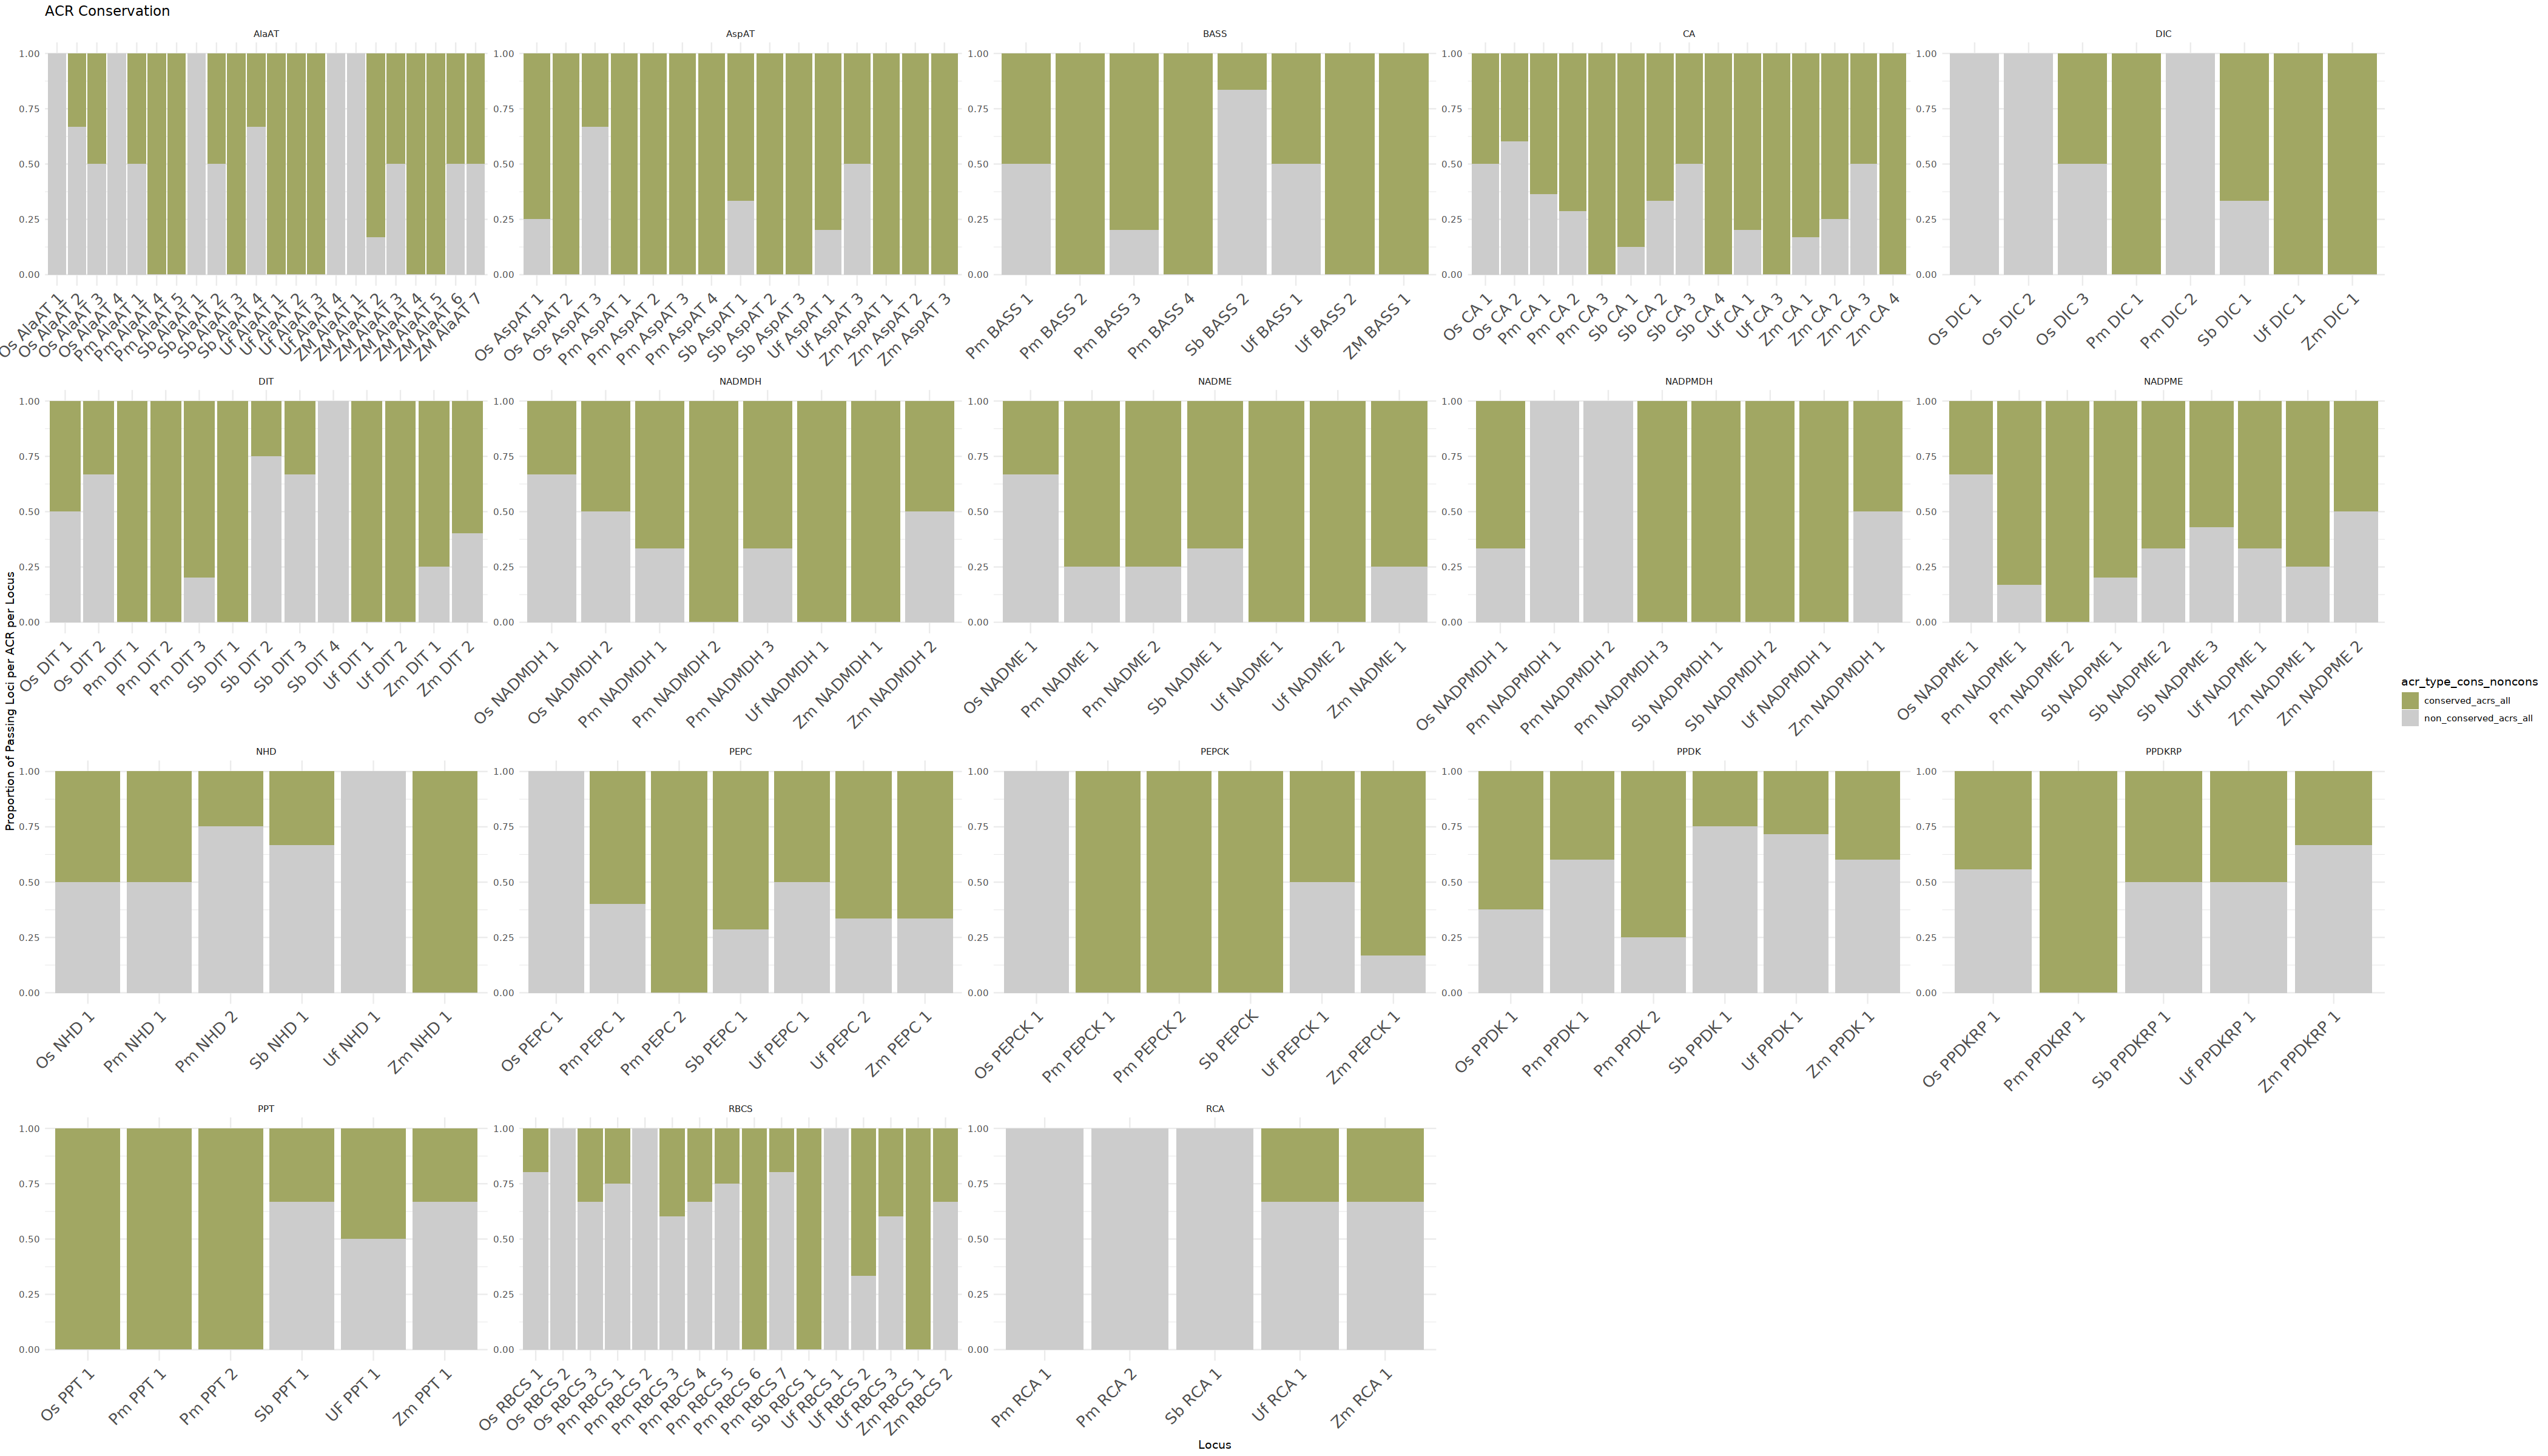

In [177]:
colors <- c("#a1a763", "#CCCCCC")
combined_gene_family_merged_cell_types_graphing <- combined_gene_family_merged_cell_types
combined_gene_family_merged_cell_types_graphing$locus <- gsub("__", " ", combined_gene_family_merged_cell_types$locus)
combined_gene_family_merged_cell_types_graphing$locus <- gsub("_", " ", combined_gene_family_merged_cell_types_graphing$locus)


options(repr.plot.width=35, repr.plot.height=20)
# Generate the barplot
ggplot(combined_gene_family_merged_cell_types_graphing, aes(x = locus, y = proportion, fill = acr_type_cons_noncons)) +
  geom_bar(stat = "identity") +
   labs(x = "Locus", y = "Proportion of Passing Loci per ACR per Locus") +
   theme_minimal() +
  facet_wrap(.~gene_family, scales = "free") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 15)) + 
    ggtitle("ACR Conservation") + 
    scale_fill_manual(values = colors) # Repeating colors for each subcategory# Adjust text angle and size for better readability

### Generation of Figures looking at CELL TYPE SPECIFIC CONSERVATION of regulatory regions

In [191]:
combined_acr_number_conservation_count_longer <- combined_acr_number_conservation_count %>% 
     pivot_longer(cols = c(conserved_acr_count, non_conserved_acrs),
        names_to = "acr_class",
        values_to = "acr_count") %>% 
    dplyr::mutate(proportion = acr_count / total_acrs)

In [192]:
unique(combined_gene_family$acr_cell_type_specific_class)

[1] "broadly_accessible"                          
[2] "mesophyll"                                   
[3] "bundle_sheath"                               
[4] "bundle_sheath,companion_cells_sieve_elements"

In [193]:
combined_gene_family <- combined_acr_number_conservation_count_longer %>% 
    #dplyr::filter(is.na(number_passing_loci) != TRUE) %>% 
    tidyr::separate(locus, into = c("species", "loci"), sep = "__",remove = FALSE) %>%
    tidyr::separate(loci, into = c("gene_family", "number"), sep = "_", remove = FALSE) %>% 
    dplyr::mutate(acr_cell_type_specific_class = case_when(acr_cell_type_specific_class == "bundle_sheath,procambial_meristem" ~ "bundle_sheath",
                                                          acr_cell_type_specific_class == "bundle_sheath,procambium" ~ "bundle_sheath", 
                                                           
                                                          TRUE ~ acr_cell_type_specific_class))

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 2 rows [297, 298].”


In [194]:
unique(combined_gene_family$acr_cell_type_specific_class)

[1] "broadly_accessible"                          
[2] "mesophyll"                                   
[3] "bundle_sheath"                               
[4] "bundle_sheath,companion_cells_sieve_elements"

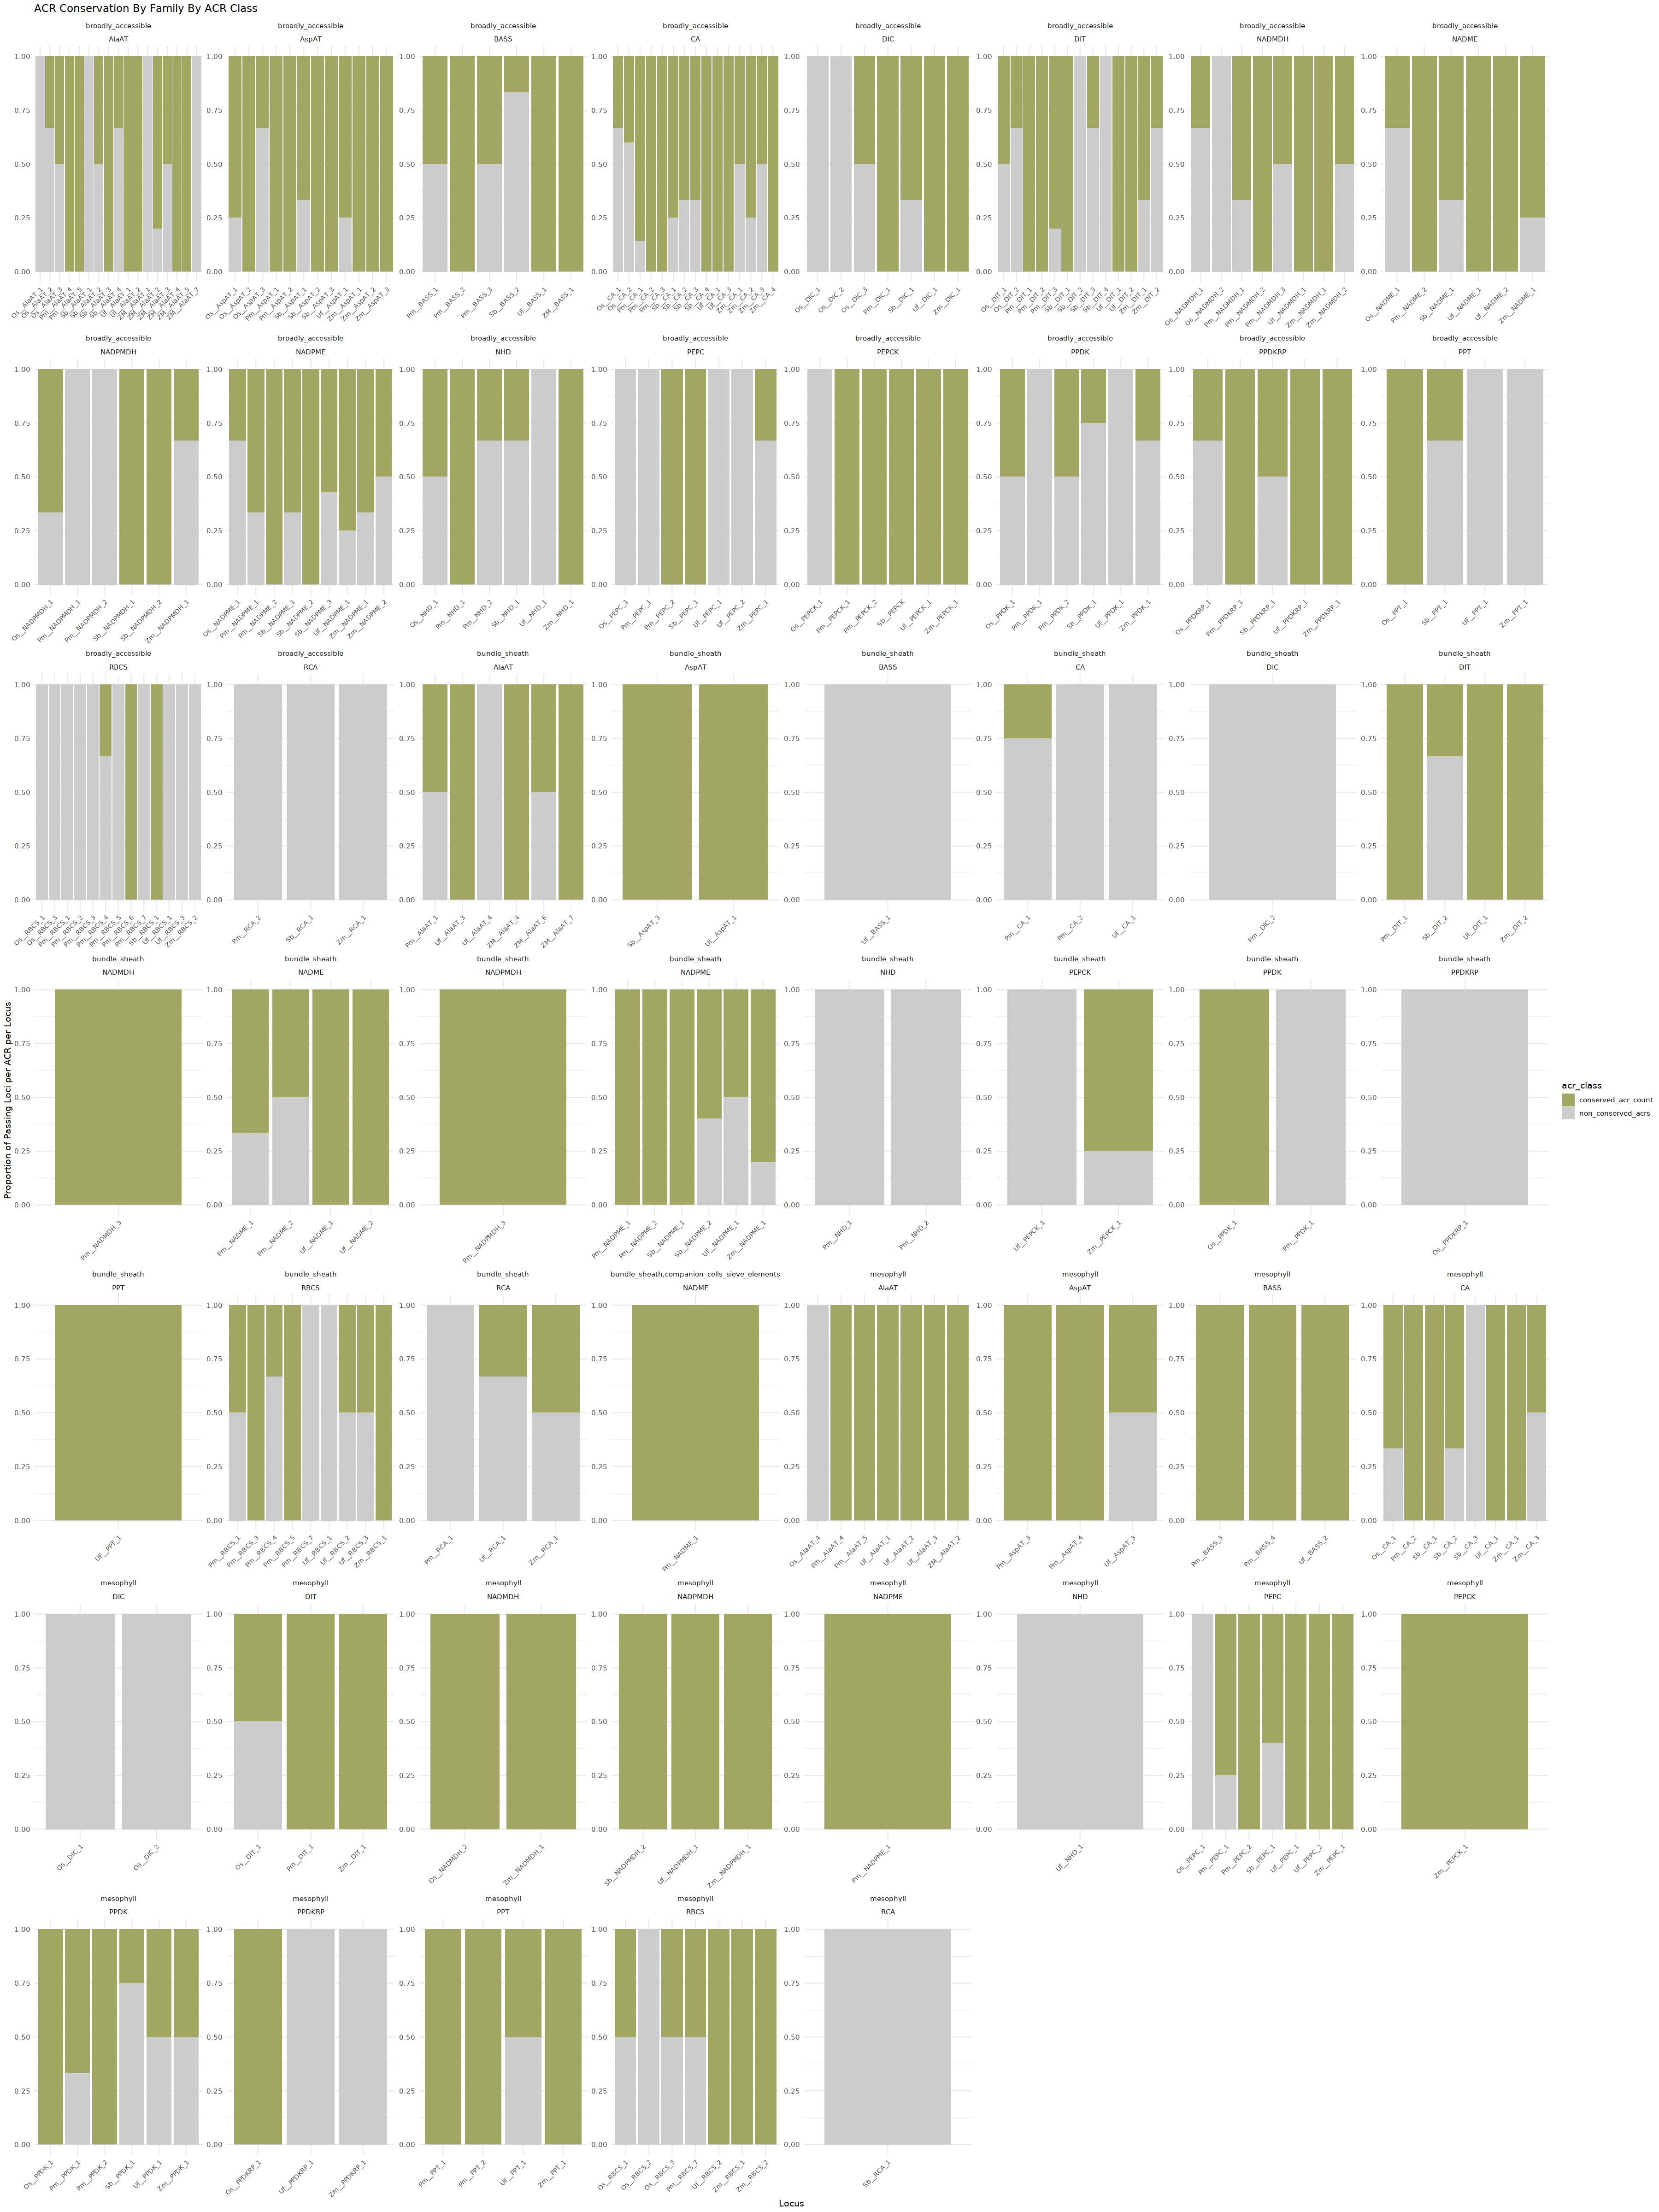

In [195]:
options(repr.plot.width=30, repr.plot.height=40)
# Generate the barplot
ggplot(combined_gene_family, aes(x = locus, y = proportion, fill = acr_class)) +
  geom_bar(stat = "identity") +
  #geom_text(vjust = -0.5, position = position_dodge(width = 0.9)) +
   labs(x = "Locus", y = "Proportion of Passing Loci per ACR per Locus") +
   theme_minimal() +
  facet_wrap(acr_cell_type_specific_class~gene_family, scales = "free") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8)) + 
    ggtitle("ACR Conservation By Family By ACR Class") +  # Adjust text angle and size for better readability
    scale_fill_manual(values = colors) # Repeating colors for each subcategory# Adjust text angle and size for better readability

## Do Cell Type Specific ACR Conservation


In [201]:
head(bs_specific_ACRs_bs_specific_enzymes)

locus,species,loci,gene_family,number,acr_cell_type_specific_class,enzyme_location,total_acrs,acr_class,acr_count,proportion
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>
Pm__AlaAT_1,Pm,AlaAT_1,AlaAT,1,bundle_sheath,bundle_sheath,2,conserved_acr_count,1,0.5
Pm__AlaAT_1,Pm,AlaAT_1,AlaAT,1,bundle_sheath,bundle_sheath,2,non_conserved_acrs,1,0.5
Pm__DIC_2,Pm,DIC_2,DIC,2,bundle_sheath,bundle_sheath,2,conserved_acr_count,0,0.0
Pm__DIC_2,Pm,DIC_2,DIC,2,bundle_sheath,bundle_sheath,2,non_conserved_acrs,2,1.0
Pm__NADMDH_3,Pm,NADMDH_3,NADMDH,3,bundle_sheath,bundle_sheath,1,conserved_acr_count,1,1.0
Pm__NADMDH_3,Pm,NADMDH_3,NADMDH,3,bundle_sheath,bundle_sheath,1,non_conserved_acrs,0,0.0


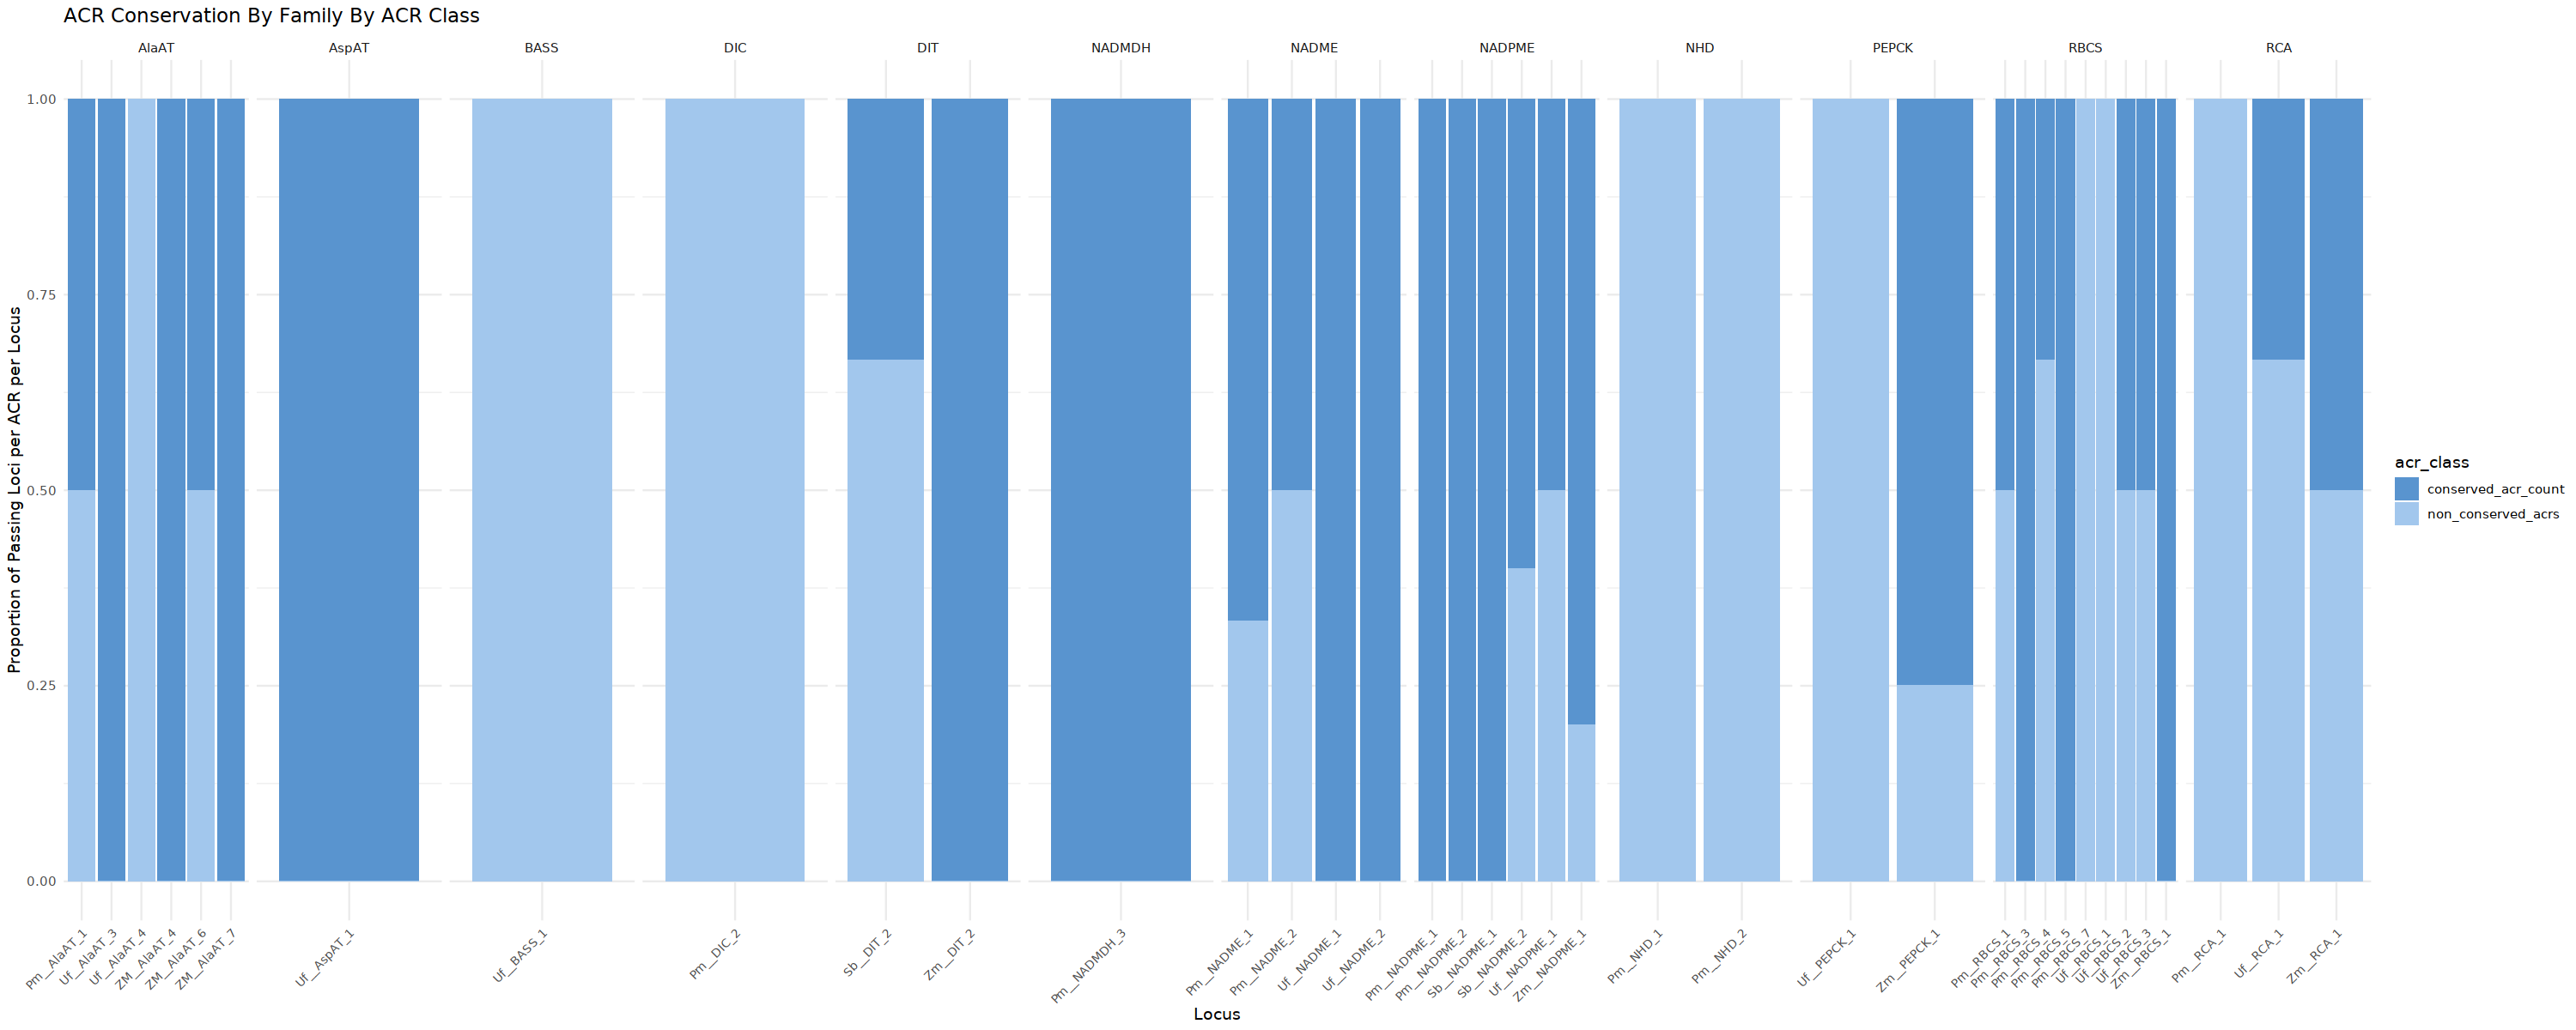

In [209]:
bs_specific_ACRs_bs_specific_enzymes <- combined_gene_family %>% 
    dplyr::filter(acr_cell_type_specific_class == "bundle_sheath" & enzyme_location %in% c("bundle_sheath", "mesophyll,bundle_sheath"))

options(repr.plot.width=25, repr.plot.height=10)
colors <- c("conserved_acr_count" = "#5994CF", "non_conserved_acrs" = "#a2c7ed")
# Generate the barplot
ggplot(bs_specific_ACRs_bs_specific_enzymes, aes(x = locus, y = proportion, fill = acr_class)) +
  geom_bar(stat = "identity") +
  #geom_text(vjust = -0.5, position = position_dodge(width = 0.9)) +
   labs(x = "Locus", y = "Proportion of Passing Loci per ACR per Locus") +
   theme_minimal() +
  facet_grid(.~gene_family, scales = "free") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8)) + 
    ggtitle("ACR Conservation By Family By ACR Class") +  # Adjust text angle and size for better readability
  scale_fill_manual(values = colors)  # Use the defined colors

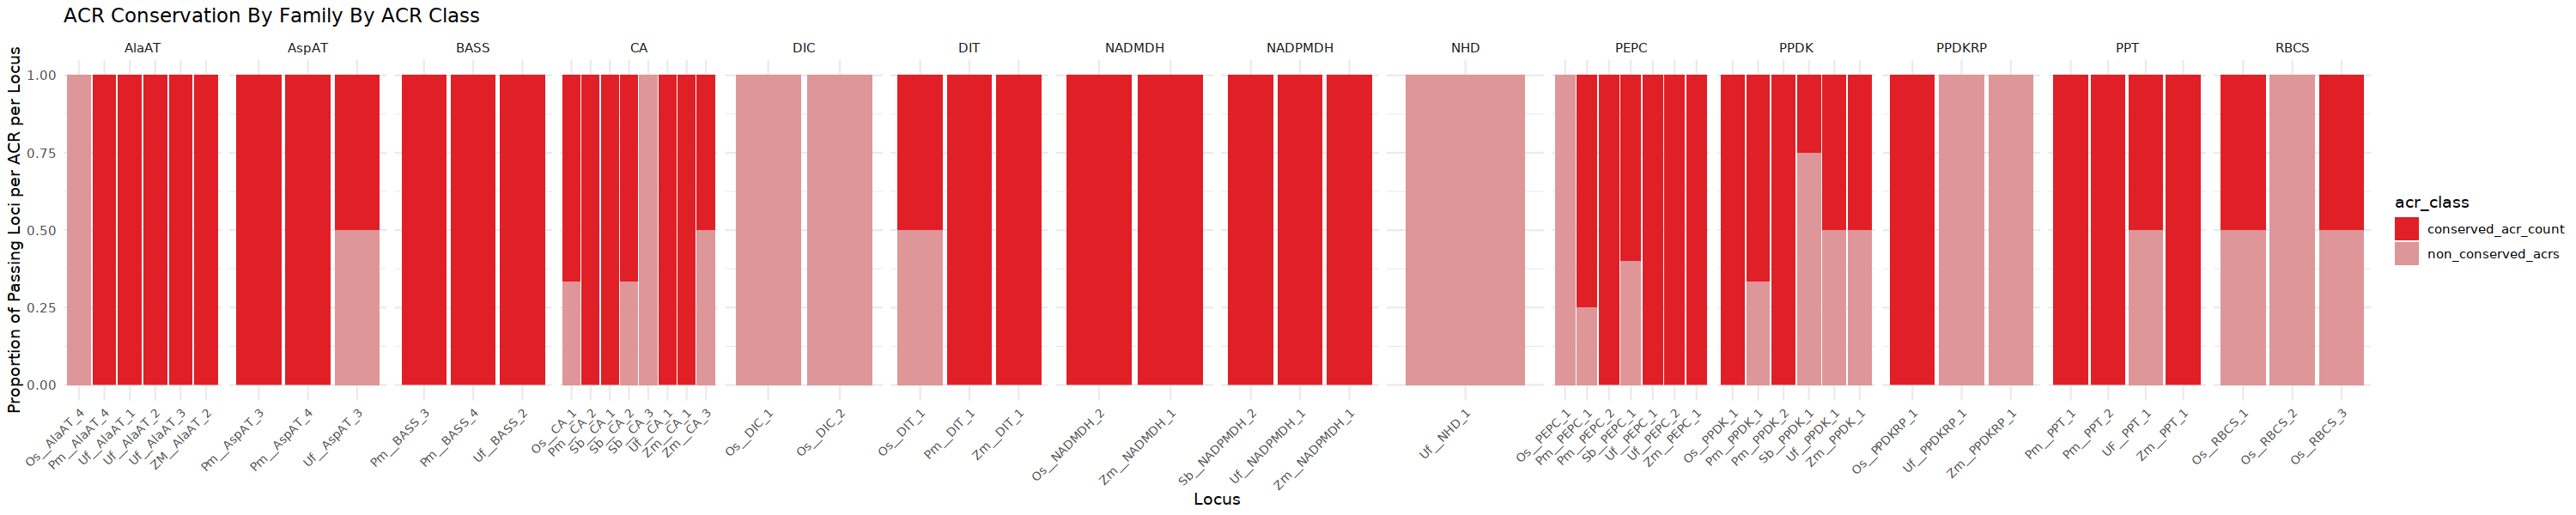

In [213]:
ms_specific_ACRs_ms_specific_enzymes <- combined_gene_family %>% 
    dplyr::filter(acr_cell_type_specific_class == "mesophyll" & enzyme_location %in% c("mesophyll", "mesophyll,bundle_sheath"))

options(repr.plot.width=25, repr.plot.height=5)
colors <- c("conserved_acr_count" = "#E11F26", "non_conserved_acrs" = "#de9699")
# Generate the barplot
ggplot(ms_specific_ACRs_ms_specific_enzymes, aes(x = locus, y = proportion, fill = acr_class)) +
  geom_bar(stat = "identity") +
  #geom_text(vjust = -0.5, position = position_dodge(width = 0.9)) +
   labs(x = "Locus", y = "Proportion of Passing Loci per ACR per Locus") +
   theme_minimal() +
  facet_grid(.~gene_family, scales = "free") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8)) + 
    ggtitle("ACR Conservation By Family By ACR Class") +  # Adjust text angle and size for better readability
  scale_fill_manual(values = colors)  # Use the defined colors

In [96]:
bs_specific_enzymes_bs_acrs <- combined_gene_family %>% 
    dplyr::filter(cts_acts == "bundle_sheath") #&& type == "bundle_sheath")

ms_specific_enzymes_ms_acrs <- combined_gene_family %>% 
    dplyr::filter(cts_acts == "mesophyll") # && type == "mesophyll")


ms_specific_enzymes_bs_acrs <- combined_gene_family %>% 
    dplyr::filter(cts_acts == "mesophyll" && type == "bundle_sheath")


options(repr.plot.width=20, repr.plot.height=20)
# Generate the barplot
ggplot(bs_specific_enzymes_bs_acrs, aes(x = name, y = proportion, fill = acr_class)) +
  geom_bar(stat = "identity") +
  #geom_text(vjust = -0.5, position = position_dodge(width = 0.9)) +
   labs(x = "Locus", y = "Proportion of Passing Loci per ACR per Locus") +
   theme_minimal() +
  facet_wrap(.~gene_family, scales = "free") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8)) + 
    ggtitle("BS Speficifc ACR Conservastion") # Adjust text angle and size for better readability

ggplot(ms_specific_enzymes_ms_acrs, aes(x = name, y = proportion, fill = acr_class)) +
  geom_bar(stat = "identity") +
  #geom_text(vjust = -0.5, position = position_dodge(width = 0.9)) +
   labs(x = "Locus", y = "Proportion of Passing Loci per ACR per Locus") +
   theme_minimal() +
  facet_wrap(.~gene_family, scales = "free") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8)) +# Adjust text angle and size for better readability
  ggtitle("MS Speficifc ACR Conservastion")


# ggplot(ms_specific_enzymes_bs_acrs, aes(x = name, y = proportion, fill = acr_class)) +
#   geom_bar(stat = "identity") +
#   #geom_text(vjust = -0.5, position = position_dodge(width = 0.9)) +
#    labs(x = "Locus", y = "Proportion of Passing Loci per ACR per Locus") +
#    theme_minimal() +
#   facet_wrap(.~gene_family, scales = "free") +
#   theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8)) # Adjust text angle and size for better readability

ERROR: [1m[33mError[39m in `dplyr::filter()`:[22m
[1m[22m[36mℹ[39m In argument: `cts_acts == "bundle_sheath"`.
[1mCaused by error:[22m
[33m![39m object 'cts_acts' not found


In [ ]:
combined_gene_family <- combined_gene_family %>%
  group_by(name, acr_class) %>%
  mutate(total = sum(acr_count)) %>%
  ungroup() %>%
  mutate(proportion = acr_count / total)

# Generate the barplot
ggplot(combined_gene_family, aes(x = name, y = proportion, fill = acr_class)) +
  geom_bar(stat = "identity") +
  labs(x = "Locus", y = "Proportion of Passing Loci per ACR per Locus") +
  theme_minimal() +
  facet_wrap(cts_acts~gene_family, scales = "free") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8)) # Adjust text angle and 

In [12]:
combined_counts_cons

locus,species,loci,gene_family,number,cell_type,number_acrs_per_locus,number_passing_loci,proportion
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>
Sb__CA_2,Sb,CA_2,CA,2,ms,7,7,1.0000000
Uf__RBCS_3,Uf,RBCS_3,RBCS,3,bs,7,NA,NA
Pm__NADME_1,Pm,NADME_1,NADME,1,bs,6,NA,NA
Uf__PPDK_1,Uf,PPDK_1,PPDK,1,ms,6,5,0.8333333
Pm__NADME_2,Pm,NADME_2,NADME,2,bs,5,5,1.0000000
Sb__NADPME_2,Sb,NADPME_2,NADPME,2,bs,5,4,0.8000000
Sb__PEPC_1,Sb,PEPC_1,PEPC,1,ms,5,4,0.8000000
Uf__PEPCK_1,Uf,PEPCK_1,PEPCK,1,bs,5,3,0.6000000
Zm__CA_3,Zm,CA_3,CA,3,ms,5,5,1.0000000


In [56]:
combined_df %>% 
    dplyr::filter(locus == "Pm__NADME_1")

qChr,qStart,qEnd,acr,acr_cell_type,locus,pval,refFile,rChr,rStart,rEnd,rName,rWidth,cell_type,species
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
CM009690.2,32769759,32770260,scACR_5398,bundle_sheath,Pm__NADME_1,0.0000000000,.,.,-1,-1,.,0,bs,PM
CM009690.2,32771517,32772018,scACR_5399,bundle_sheath,Pm__NADME_1,0.0001666611,.,.,-1,-1,.,0,bs,PM
CM009690.2,32773434,32773935,scACR_5401,bundle_sheath,Pm__NADME_1,0.0001333289,.,.,-1,-1,.,0,bs,PM
CM009690.2,32777764,32778265,scACR_5402,bundle_sheath,Pm__NADME_1,0.0000000000,.,.,-1,-1,.,0,bs,PM
CM009690.2,32779390,32779891,scACR_5403,bundle_sheath,Pm__NADME_1,0.0000000000,.,.,-1,-1,.,0,bs,PM
CM009690.2,32786382,32786883,scACR_5405,bundle_sheath,Pm__NADME_1,0.0000000000,.,.,-1,-1,.,0,bs,PM
